
## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

# PART- 3 `( Handling Outliers )`

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

In [109]:
df0 = pd.read_csv('autoscoutpart_2.csv')

In [110]:
df = df0.copy()

## functions to fill the missing values

In [111]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [112]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [113]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [114]:
df.shape

(15919, 33)

In [115]:
df.head(1).T

,0
make_model,Audi A1
body_type,Sedans
price,15770.000
vat,YES deduction/negotiation
km,56013.000
inspection_new,Yes
body_color,Black
paint_type,Metallic
nr._of_doors,5.000
nr._of_seats,5.000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   body_type              15919 non-null  object 
 2   price                  15919 non-null  float64
 3   vat                    15919 non-null  object 
 4   km                     15919 non-null  float64
 5   inspection_new         15919 non-null  object 
 6   body_color             15919 non-null  object 
 7   paint_type             15919 non-null  object 
 8   nr._of_doors           15919 non-null  float64
 9   nr._of_seats           15919 non-null  float64
 10  gearing_type           15919 non-null  object 
 11  cylinders              15919 non-null  float64
 12  drive_chain            15919 non-null  object 
 13  fuel                   15919 non-null  object 
 14  co2_emission           15919 non-null  float64
 15  em

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18022.623,7381.798,4950.000,12850.000,16900.000,21900.000,74600.000
km,15919.000,32082.632,36975.502,0.000,1906.500,20407.000,46898.500,317000.000
nr._of_doors,15919.000,4.660,0.642,2.000,4.000,5.000,5.000,5.000
nr._of_seats,15919.000,4.947,0.486,2.000,5.000,5.000,5.000,7.000
cylinders,15919.000,3.786,0.414,3.000,4.000,4.000,4.000,5.000
co2_emission,15919.000,118.082,16.952,91.000,105.000,117.000,128.000,189.000
emission_label,15919.000,3.928,0.460,1.000,4.000,4.000,4.000,5.000
gears,15919.000,5.948,0.731,5.000,5.000,6.000,6.000,9.000
age,15919.000,1.389,1.121,0.000,0.000,1.000,2.000,3.000
hp_kw,15919.000,88.512,26.713,40.000,66.000,85.000,103.000,294.000


In [118]:
df['cons_city_l/100_km'].skew()

0.37642746962652146

In [119]:
df['cons_comb_l/100_km'].skew()

0.8078774954022488

In [120]:
df['cons_country_l/100_km'].skew()

1.6520754260236912

In [121]:
df.describe(include=object).T

,count,unique,top,freq
make_model,15919,9,Audi A3,3097
body_type,15919,9,Sedans,7923
vat,15919,2,YES deduction/negotiation,11406
inspection_new,15919,2,Yes,12818
body_color,15919,15,Black,3899
paint_type,15919,3,Metallic,15504
gearing_type,15919,3,Manual,8153
drive_chain,15919,2,front,15675
fuel,15919,5,Benzin,8545
emission_class,15919,3,Euro 6,15799


In [122]:
num = df.drop(['price'], axis=1).select_dtypes('number').columns

In [94]:
df[num]

,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
0,56013.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,4.300,3.500
1,80000.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,7.100,4.700
2,83450.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,4.400,3.400
3,73000.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,4.300,3.500
4,16200.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,4.600,3.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1652.839,5.000,5.000,4.000,139.000,4.000,6.000,0.000,147.000,1997.000,1758.000,5.300,6.200,4.700
15915,9900.000,5.000,5.000,4.000,168.000,4.000,7.000,0.000,165.000,1798.000,1708.000,7.400,9.200,6.300
15916,15.000,5.000,7.000,4.000,139.000,4.000,6.000,0.000,146.000,1997.000,1840.000,5.300,6.200,4.700
15917,10.000,5.000,7.000,4.000,139.000,4.000,6.000,0.000,147.000,1997.000,1758.000,5.300,6.200,4.700


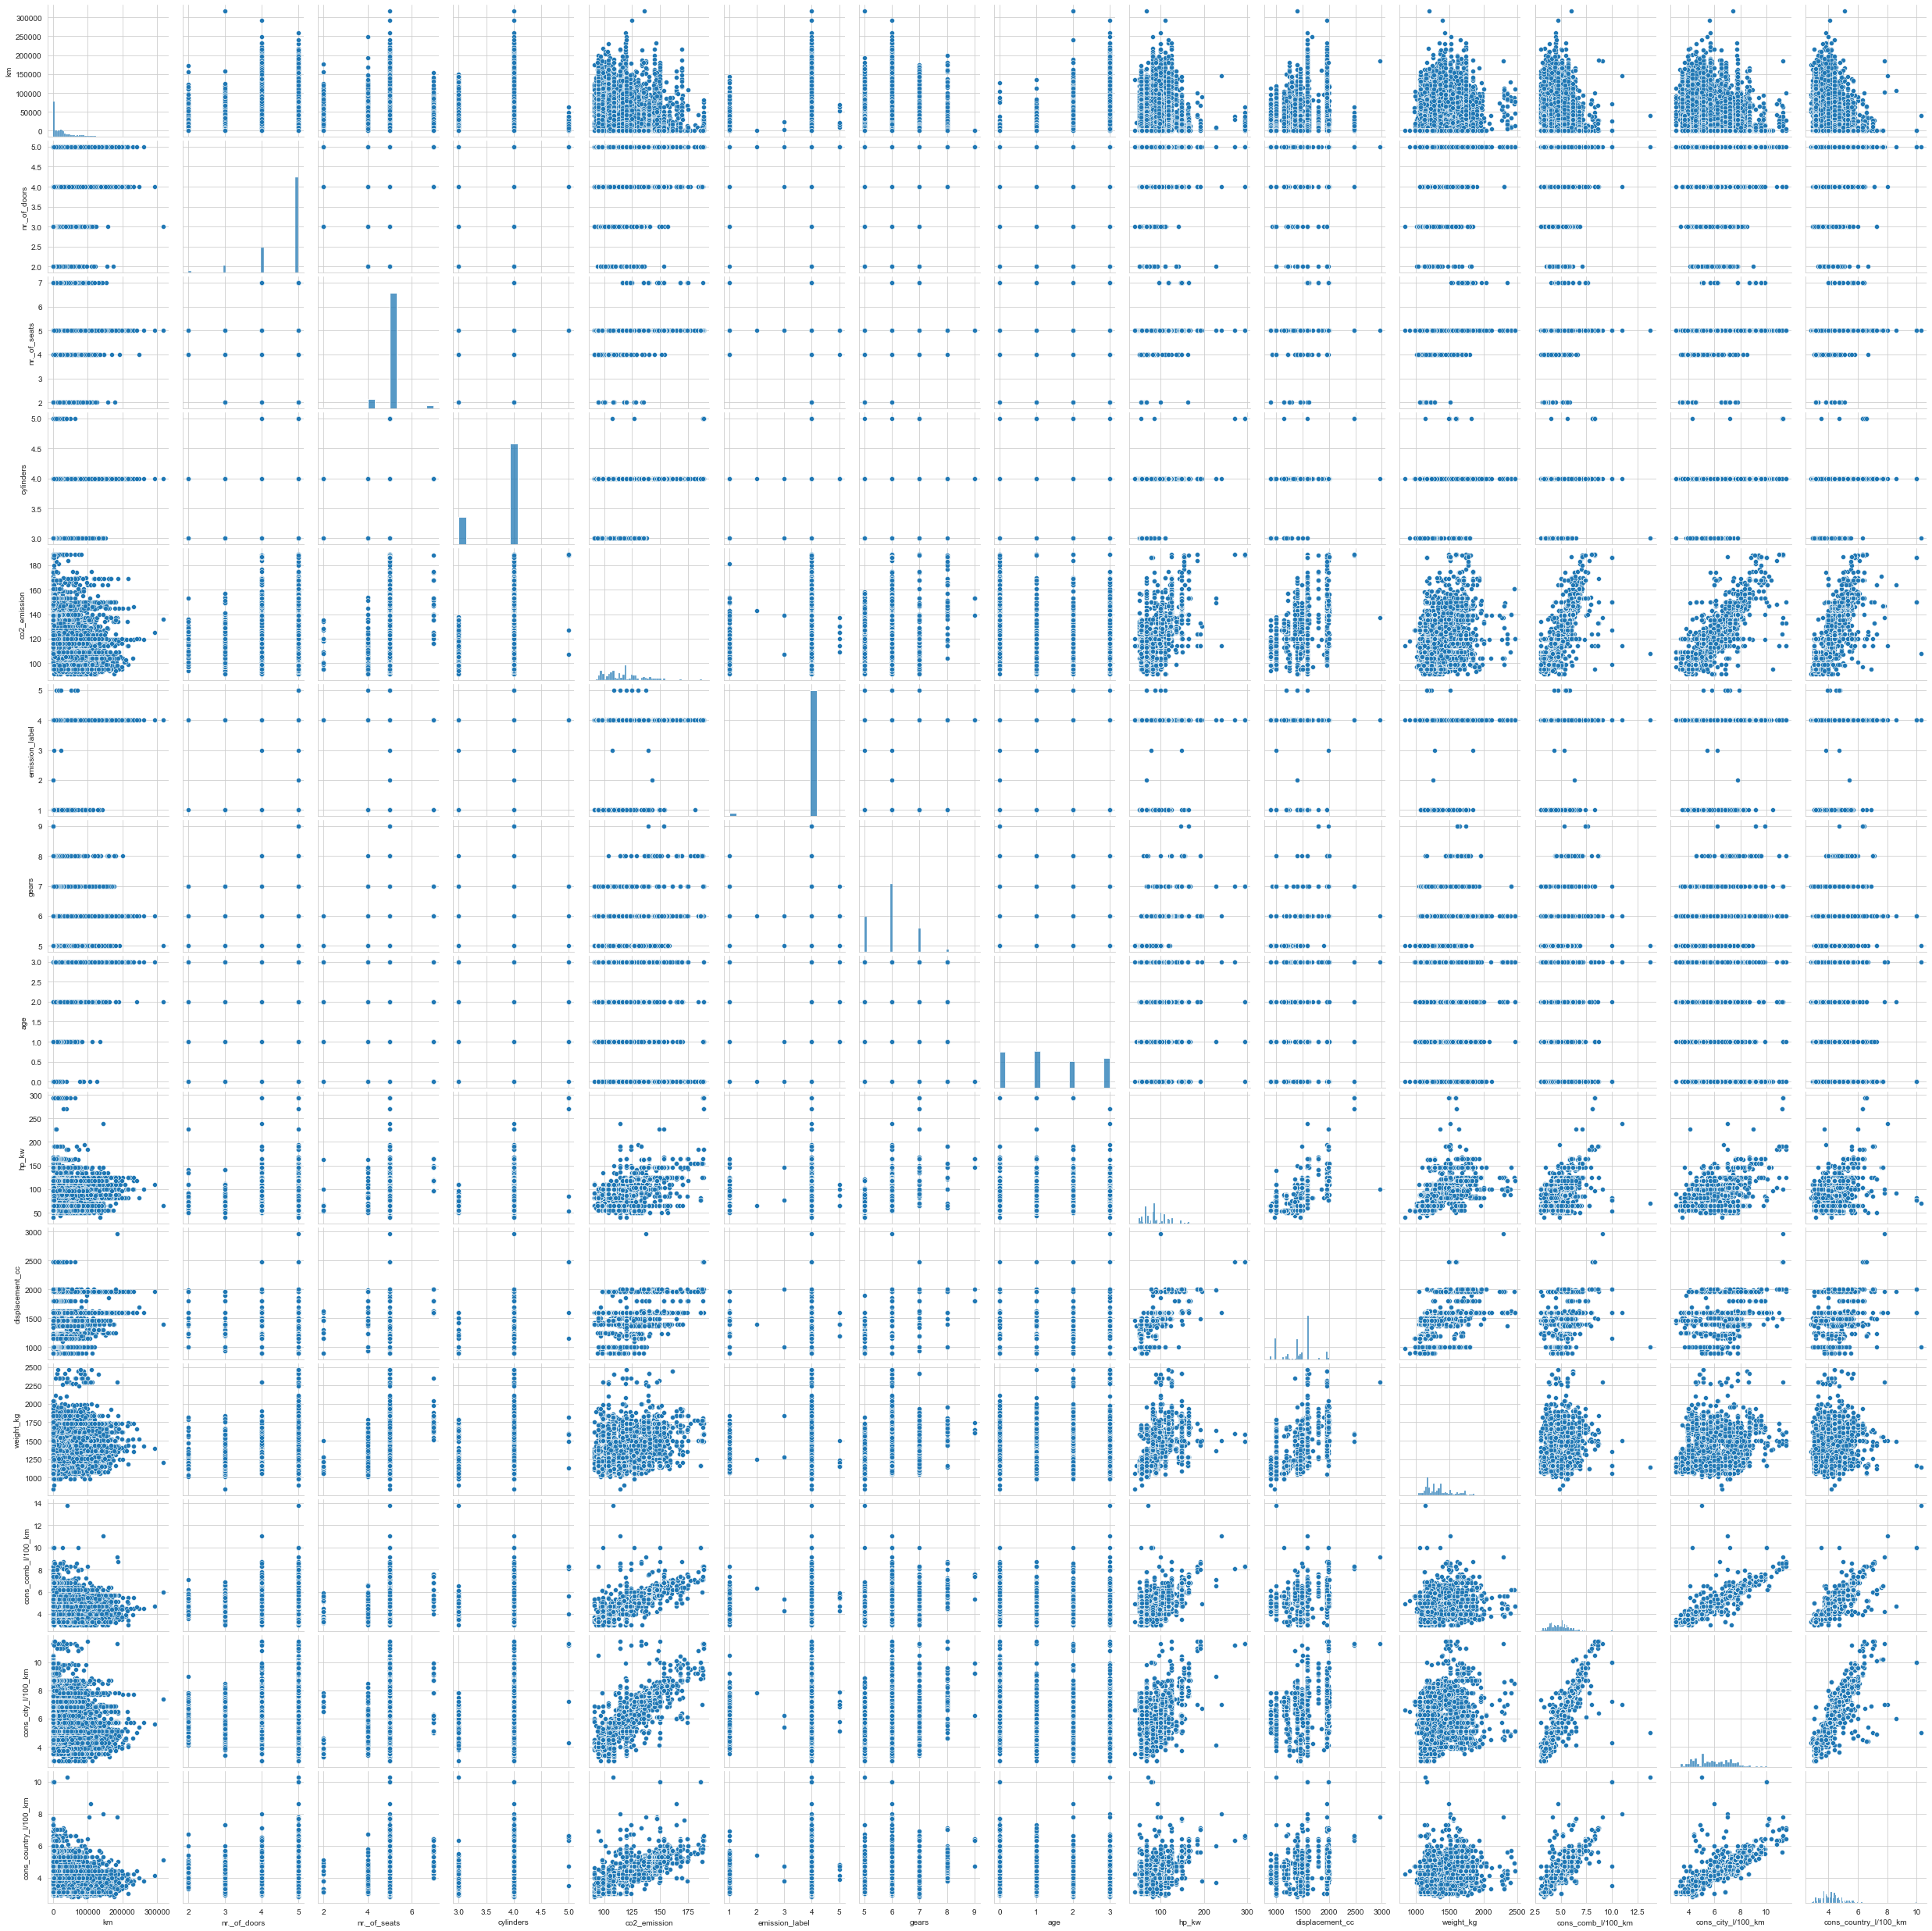

In [123]:
sns.pairplot(df[num], size = 2.5)
plt.show();

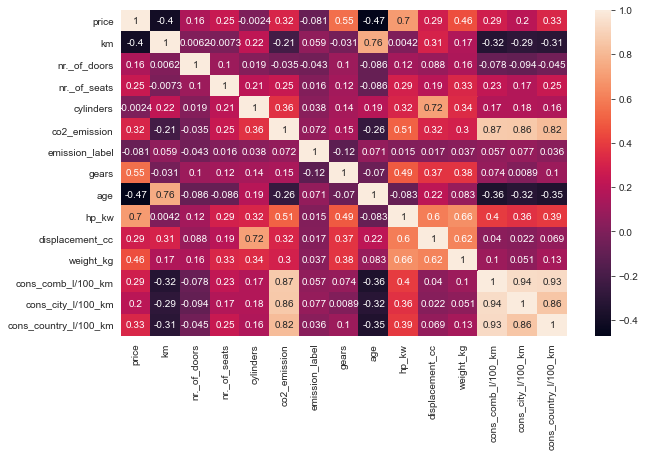

In [124]:
sns.heatmap(df.corr(), annot=True);

In [125]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'inspection_new',
       'body_color', 'paint_type', 'nr._of_doors', 'nr._of_seats',
       'gearing_type', 'cylinders', 'drive_chain', 'fuel', 'co2_emission',
       'emission_class', 'comfort_convenience', 'entertainment_media',
       'extras', 'safety_security', 'emission_label', 'gears', 'age', 'hp_kw',
       'vehicle_condition', 'warranty_month', 'upholstery_type',
       'upholstery_color', 'displacement_cc', 'weight_kg',
       'cons_comb_l/100_km', 'cons_city_l/100_km', 'cons_country_l/100_km'],
      dtype='object')

In [126]:
#df.drop(['cons_city_l/100_km', 'cons_country_l/100_km'], axis=1, inplace=True)

In [127]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770.000,14500.000,14640.000,14500.000,16790.000
vat,YES deduction/negotiation,YES deduction/negotiation,YES deduction/negotiation,NO deduction/negotiation,NO deduction/negotiation
km,56013.000,80000.000,83450.000,73000.000,16200.000
inspection_new,Yes,No,Yes,Yes,Yes
body_color,Black,Red,Black,Brown,Black
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
nr._of_doors,5.000,3.000,4.000,3.000,5.000
nr._of_seats,5.000,4.000,4.000,4.000,5.000


In [128]:
df.shape

(15919, 31)

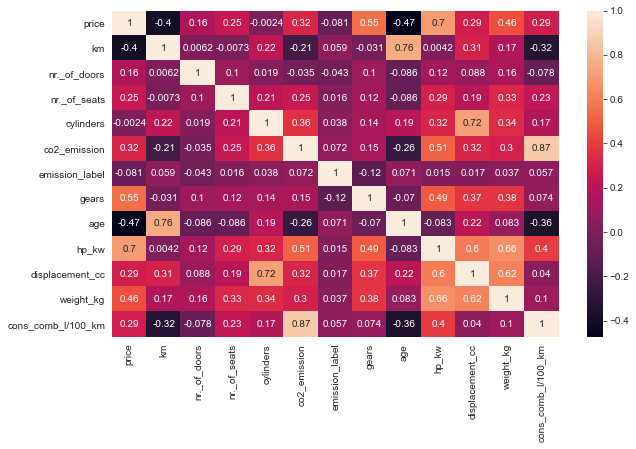

In [129]:
sns.heatmap(df.corr(), annot=True);

In [130]:
df.shape

(15919, 31)

## Dummy Operation

In [131]:
#df.to_csv("autoscoutpart_3_before_dummy.csv", index=False)

In [133]:
cat = df.select_dtypes('object').columns
cat

Index(['make_model', 'body_type', 'vat', 'inspection_new', 'body_color',
       'paint_type', 'gearing_type', 'drive_chain', 'fuel', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'vehicle_condition', 'warranty_month',
       'upholstery_type', 'upholstery_color'],
      dtype='object')

In [134]:
#df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("coco_"))
#df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("entmedia_"))
#df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("extrs_"))
#df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("safesec_"))

In [137]:
#df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [138]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'inspection_new',
       'body_color', 'paint_type', 'nr._of_doors', 'nr._of_seats',
       ...
       'safesec_Lane departure warning system', 'safesec_Night view assist',
       'safesec_Passenger-side airbag', 'safesec_Power steering',
       'safesec_Rear airbag', 'safesec_Side airbag',
       'safesec_Tire pressure monitoring system', 'safesec_Traction control',
       'safesec_Traffic sign recognition', 'safesec_Xenon headlights'],
      dtype='object', length=121)

In [139]:
df.shape

(15919, 121)

In [140]:
#df_final = pd.get_dummies(df)

In [142]:
df_final.shape

(15919, 180)

In [147]:
#df_final.head()

,price,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_Air conditioning,coco_Air suspension,coco_Armrest,coco_Automatic climate control,coco_Auxiliary heating,coco_Cruise control,coco_Electric Starter,coco_Electric tailgate,coco_Electrical side mirrors,coco_Electrically adjustable seats,coco_Electrically heated windshield,coco_Heads-up display,coco_Heated steering wheel,coco_Hill Holder,coco_Keyless central door lock,coco_Leather seats,coco_Leather steering wheel,coco_Light sensor,coco_Lumbar support,coco_Massage seats,coco_Multi-function steering wheel,coco_Navigation system,coco_Panorama roof,coco_Park Distance Control,coco_Parking assist system camera,coco_Parking assist system self-steering,coco_Parking assist system sensors front,coco_Parking assist system sensors rear,coco_Power windows,coco_Rain sensor,coco_Seat heating,coco_Seat ventilation,coco_Split rear seats,coco_Start-stop system,coco_Sunroof,coco_Tinted windows,coco_Wind deflector,...,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Gray,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,fuel_Benzin,fuel_Diesel,fuel_Hybrid,fuel_LPG,fuel_Others,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,vehicle_condition_New,vehicle_condition_Used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_Cloth,upholstery_type_Full leather,upholstery_type_Other,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara,upholstery_color_Beige,upholstery_color_Black,upholstery_color_Blue,upholstery_color_Brown,upholstery_color_Grey,upholstery_color_Orange,upholstery_color_Other,upholstery_color_Red,upholstery_color_White,upholstery_color_Yellow
0,15770.000,56013.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [149]:
#df_final.columns= df_final.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [150]:
df_final.head()

,price,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,coco_wind_deflector,...,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_metallic,paint_type_perl_effect,paint_type_uni/basic,gearing_type_automatic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_4wd,drive_chain_front,fuel_benzin,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_4,emission_class_euro_5,emission_class_euro_6,vehicle_condition_new,vehicle_condition_used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_cloth,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_beige,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
0,15770.000,56013.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [146]:
df_final.info

<bound method DataFrame.info of           price        km  nr._of_doors  nr._of_seats  cylinders  \
0     15770.000 56013.000         5.000         5.000      3.000   
1     14500.000 80000.000         3.000         4.000      4.000   
2     14640.000 83450.000         4.000         4.000      4.000   
3     14500.000 73000.000         3.000         4.000      3.000   
4     16790.000 16200.000         5.000         5.000      3.000   
...         ...       ...           ...           ...        ...   
15914 39950.000  1652.839         5.000         5.000      4.000   
15915 39885.000  9900.000         5.000         5.000      4.000   
15916 39875.000    15.000         5.000         7.000      4.000   
15917 39700.000    10.000         5.000         7.000      4.000   
15918 40999.000  1652.839         5.000         5.000      4.000   

       co2_emission  emission_label  gears   age   hp_kw  displacement_cc  \
0            99.000           4.000  7.000 3.000  66.000         1422.000 

In [152]:
df_final.to_csv("autoscoutpart_3_dummy.csv", index=False)

In [154]:
df1 = pd.read_csv('autoscoutpart_3_dummy.csv')

In [155]:
df1.head()

,price,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,coco_wind_deflector,...,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_metallic,paint_type_perl_effect,paint_type_uni/basic,gearing_type_automatic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_4wd,drive_chain_front,fuel_benzin,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_4,emission_class_euro_5,emission_class_euro_6,vehicle_condition_new,vehicle_condition_used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_cloth,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_beige,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
0,15770.000,56013.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
